<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_MLP_GRID_Lab_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Caso: **Breast Cancer**

Esse é um dataset clássico empregado para *benchmark* de alguns modelos de classificação. Ele traz dados de exames de vários tumores de mama classificados em benignos e malignos.

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Aquisição dos dados

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['diagnosis'] = pd.Series(cancer.target)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Verifique Dados Ausentes

In [ ]:
df.isnull().sum().sum()

0

# Verifique Preditores muito Correlacionados

Verifique se existem atributos preditores muito correlacionados $abs(correlation) > 0.9$ e empregue a função abaixo para excluir os atributos muito correlacionados.

In [ ]:
(df.corr() > 0.9).sum()

mean radius                6
mean texture               2
mean perimeter             6
mean area                  6
mean smoothness            1
mean compactness           1
mean concavity             2
mean concave points        3
mean symmetry              1
mean fractal dimension     1
radius error               3
texture error              1
perimeter error            3
area error                 3
smoothness error           1
compactness error          1
concavity error            1
concave points error       1
symmetry error             1
fractal dimension error    1
worst radius               6
worst texture              2
worst perimeter            6
worst area                 6
worst smoothness           1
worst compactness          1
worst concavity            1
worst concave points       2
worst symmetry             1
worst fractal dimension    1
diagnosis                  1
dtype: int64

In [ ]:
def drop_corr(df,correlation_threshold):

  correlation_matrix = df.corr()

  columns_to_exclude = set()
  n_columns = len(correlation_matrix.columns)

  for i in range(n_columns):
      for j in range(i+1, n_columns):
          if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
              column_name_i = correlation_matrix.columns[i]
              column_name_j = correlation_matrix.columns[j]

              columns_to_exclude.add(column_name_j)

  df = df.drop(columns=list(columns_to_exclude))

  return df


In [ ]:
df = drop_corr(df,correlation_threshold=0.9)

In [ ]:
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,0


In [ ]:
(df.corr() > 0.9).sum()

mean radius                1
mean texture               1
mean smoothness            1
mean compactness           1
mean concavity             1
mean symmetry              1
mean fractal dimension     1
radius error               1
texture error              1
smoothness error           1
compactness error          1
concavity error            1
concave points error       1
symmetry error             1
fractal dimension error    1
worst smoothness           1
worst compactness          1
worst concavity            1
worst symmetry             1
worst fractal dimension    1
diagnosis                  1
dtype: int64

In [ ]:
#@markdown check
df.shape[1] == 21

True

In [ ]:
#@markdown check
all((df.corr() > 0.9).sum() == 1)

True

# Normalização

Aplique a normalização `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(df.drop(columns='diagnosis'))

df_scaled = scaler.transform(df.drop(columns='diagnosis'))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop(columns='diagnosis').columns)

df_scaled = pd.concat([df_scaled,df[['diagnosis']]],axis=1)

df = df_scaled
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,...,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,diagnosis
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.217515,2.255747,2.489734,-0.565265,-0.214002,...,0.724026,0.660820,1.148757,0.907083,1.307686,2.616665,2.109526,2.750622,1.937015,0
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,0.499255,-0.876244,-0.605351,...,-0.440780,0.260162,-0.805450,-0.099444,-0.375612,-0.430444,-0.146749,-0.243890,0.281190,0
2,1.579888,0.456187,0.942210,1.052926,1.363478,0.939685,-0.398008,1.228676,-0.780083,-0.297005,...,0.213076,1.424827,0.237036,0.293559,0.527407,1.082932,0.854974,1.152255,0.201391,0
3,-0.768909,0.253732,3.283553,3.402909,1.915897,2.867383,4.910919,0.326373,-0.110409,0.689702,...,0.819518,1.115007,4.732680,2.047511,3.394275,3.893397,1.989588,6.046041,4.935010,0
4,1.750297,-1.151816,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.270543,-0.790244,1.483067,...,0.828471,1.144205,-0.361092,0.499328,0.220556,-0.313395,0.613179,-0.868353,-0.397100,0


In [ ]:
#@markdown check
df[df.columns[0:2]].sum().sum() == -5.53157519789238e-12

True

# Multilayer Perceptron 1

Treine o modelo MLP abaixo. Empregue um conjunto de treinamento e teste com 0.3 de dados de teste, estratificados pela variável objetivo e `random_state=1`.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop(columns='diagnosis')
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

mlp = MLPClassifier(hidden_layer_sizes=[8], random_state=1, max_iter=1000, early_stopping=True, n_iter_no_change=100)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.98      0.78      0.87        64
           1       0.88      0.99      0.93       107

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171



# Q1.
Qual a acuracidade do modelo obtida?

# Q2.
Qual classe que apresenta maior Erro Tipo I e Erro Tipo II respectivamente?

# Trainning History

Empregue o gráfico de evolução do treinamento do modelo (função abaixo) para responder a seguinte questão.

# Q3.
Observando de evolução do treinamento do modelo, em que número de épocas de treinamento (`max_iter`) seria aparentemente suficiente interromper o treinamento
obtendo a mesma acuracidade? (assinale a melhor alternativa)

Faça a alteração dess número no seu código e veja o resultado!

# Q4.
Observando o gráfico de evolução do treinamento do modelo podemos entender que o `early-stopping` pode ser empregado para reduzir o overfitting de um modelo de redes neurais. TRUE | FALSE



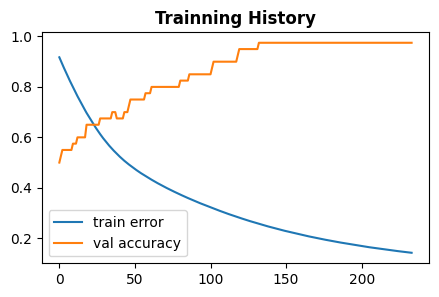

In [ ]:
plt.figure(figsize=(5, 3))

plt.plot(mlp.loss_curve_, label="train error")
plt.plot(mlp.validation_scores_, label="val accuracy")
plt.title('Trainning History', weight='bold')
plt.legend()
plt.show()

# Curva ROC
Construa a curva ROC do modelo MLP.

# Q5.
Qual a AUC obtida na curva ROC?
{
  0.91
  0.89
  0.88
  0.79
  0.98
}  


# Q6.
Para um problema de classificação binária a AUC corresponde sempre a acuracidade geral do modelo. TRUE | FALSE

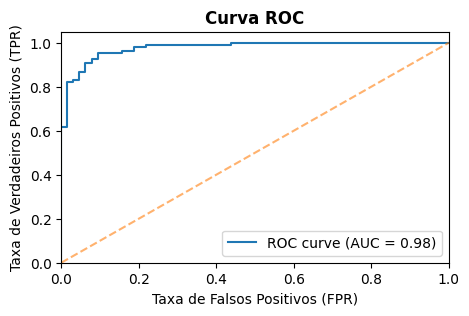

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_prob = mlp.predict_proba(X_test)[:, 1]

# Cálculo da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Cálculo da área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.6)
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC', weight='bold')

plt.legend()
plt.show()


# Multilayer Perceptron 2

Empregue o mesmo conjunto de treinamento e teste já criado e treine um modelo MLP com o GridSearchCV avaliando os melhores dos seguintes hiperparâmetros:

- Camadas ocultas: 3 de 4,8,4 elementos; 3 de 8,16,8 elementos; e uma de 64 elementos
- Funções de ativação logística, tanh e relu
- Tamanho do lote, 16 e 200

No GridSearchCV enpregue `cv=StratifiedKFold(5, shuffle=True, random_state=1)` para garantir a reprodutibilidade dos resultados (o GridSearchCV não possui o parâmetros random_state).


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

base_estimator = MLPClassifier(random_state=1, max_iter=1000, early_stopping=True)

param_grid = {'hidden_layer_sizes': [(4,8,4),(8,16,8),(64)],
              'batch_size': [16,200],
              'activation': ['logistic','tanh','relu']}

clf = GridSearchCV(base_estimator, param_grid, cv=StratifiedKFold(5, shuffle=True, random_state=1))

clf.fit(X_train, y_train)

print(clf.best_estimator_)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

MLPClassifier(activation='logistic', batch_size=16, early_stopping=True,
              hidden_layer_sizes=64, max_iter=1000, random_state=1)
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Q7.
Quais os hiperparâmetros selecionados para o melhor modelo ?



# Q8.
Qual acuracidade obtida pelo melhor modelo?


# Q9.
Qual a acuracidade do pior modelo avaliado? (dica\: explore o clf.cv_results_)
{
  0.37
}


# Q10.
Modelos MLP com mais camadas sempre resultam em melhores modelos TRUE | FALSE

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.042957,0.001656,0.003140,0.000042,logistic,200,"(4, 8, 4)","{'activation': 'logistic', 'batch_size': 200, ...",0.3750,0.3750,0.3750,0.367089,0.367089,0.371835,0.003876,18
0,0.143623,0.010418,0.002463,0.000146,logistic,16,"(4, 8, 4)","{'activation': 'logistic', 'batch_size': 16, '...",0.6250,0.6250,0.6250,0.632911,0.632911,0.628165,0.003876,14
1,0.117107,0.007152,0.002571,0.000509,logistic,16,"(8, 16, 8)","{'activation': 'logistic', 'batch_size': 16, '...",0.6250,0.6250,0.6250,0.632911,0.632911,0.628165,0.003876,14
4,0.045105,0.001561,0.003235,0.000081,logistic,200,"(8, 16, 8)","{'activation': 'logistic', 'batch_size': 200, ...",0.6250,0.6250,0.6250,0.632911,0.632911,0.628165,0.003876,14
16,0.028593,0.003674,0.002217,0.000083,relu,200,"(8, 16, 8)","{'activation': 'relu', 'batch_size': 200, 'hid...",0.6250,0.6250,0.6250,0.632911,0.632911,0.628165,0.003876,14
13,0.186937,0.083413,0.002551,0.000469,relu,16,"(8, 16, 8)","{'activation': 'relu', 'batch_size': 16, 'hidd...",0.8375,0.6250,0.6250,0.974684,0.632911,0.739019,0.143175,13
15,0.067199,0.033525,0.002189,0.000072,relu,200,"(4, 8, 4)","{'activation': 'relu', 'batch_size': 200, 'hid...",0.8625,0.7625,0.7000,0.911392,0.708861,0.789051,0.084176,12
10,0.086117,0.011762,0.002412,0.000104,tanh,200,"(8, 16, 8)","{'activation': 'tanh', 'batch_size': 200, 'hid...",0.8250,0.8000,0.8125,0.848101,0.860759,0.829272,0.022371,11
17,0.067247,0.014098,0.003068,0.000118,relu,200,64,"{'activation': 'relu', 'batch_size': 200, 'hid...",0.8875,0.8375,0.8500,0.835443,0.810127,0.844114,0.025263,10
5,0.263493,0.049496,0.006282,0.002404,logistic,200,64,"{'activation': 'logistic', 'batch_size': 200, ...",0.8625,0.9000,0.7375,0.924051,0.835443,0.851899,0.064792,9


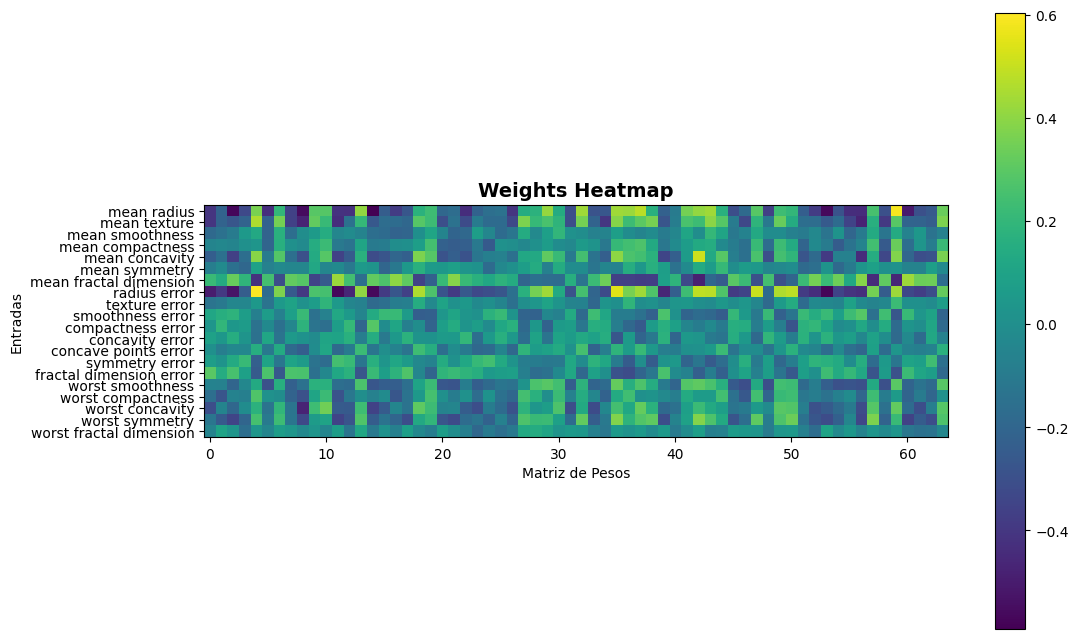

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(clf.best_estimator_.coefs_[0], interpolation='none', cmap='viridis')

plt.yticks(range(clf.best_estimator_.coefs_[0].shape[0]), X.columns)
plt.title('Weights Heatmap', weight='bold',fontsize=14)
plt.xlabel("Matriz de Pesos")
plt.ylabel("Entradas")

plt.colorbar()
plt.show()